# Test B - Quick Loop at Russian Troll Dataset Using UMAP and some of the fields - only 300,000 of 3 million rows

### GOING THROUGH THIS DEMO: https://umap-learn.readthedocs.io/en/latest/clustering.html#traditional-clustering but with this dataset of Russian Twitter Trolls

 We're using the features that can be easily converted into integer based datatypes from strings and either post_type or account_type as the label we're trying to optimize for

We expect to see a lot of overlap with these features but not complete as we expect the catagories of accounts to post on twitter over a a range of dates, times, regions, languages, retweet levels, etc. 

What we see is there is a little more separation than maybe I expected but still a lot of overlap

## I suspect if we used SpaCY (a library for natural language processing) to extract terms and keywords from the content field of each tweet, we could then back into the account_types field as that's probably similar to how they go it in the first place.
Maybe this might be starting point: https://www.kaggle.com/joeytaj/nlp-parsing-example-using-spacy

We do see a little interesting behavior in that commercial and some other types of tweets seem to have more separation? Something to investigate later, maybe?

Justin Gosses - 2018-08 , need to go back through and redo as I spotted some errors

In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import glob as glob

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from sklearn.decomposition import PCA

In [4]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [5]:
import umap


In [6]:
reducer = umap.UMAP()

In [7]:
knn_dir = "../WellsKNN/"
load_dir = "../loadLAS"
features_dir = "../createFeatures/"

In [8]:
path =r'.' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [9]:
frame_1 = frame.copy()

In [10]:
frame_1.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel slippery floors https://t.co/R...,United States,Norwegian,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2160,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer


In [11]:
all_col = list(frame_1.columns)

In [12]:
all_col

['external_author_id',
 'author',
 'content',
 'region',
 'language',
 'publish_date',
 'harvested_date',
 'following',
 'followers',
 'updates',
 'post_type',
 'account_type',
 'new_june_2018',
 'retweet',
 'account_category']

In [13]:
len(frame_1)

2973371

In [14]:
frame_1.account_category = pd.Categorical(frame_1.account_category)

In [15]:
frame_1

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel slippery floors https://t.co/R...,United States,Norwegian,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2160,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,Your opinion on Hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer
6,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Lilith from Frasier. 0_O,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2156,RETWEET,Hashtager,0,1,HashtagGamer
7,1.674084e+09,GAB1ALDANA,Come find us at the national mall for the #DC ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2157,RETWEET,Hashtager,0,1,HashtagGamer
8,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Trolling celebrities. I have...,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2161,RETWEET,Hashtager,0,1,HashtagGamer
9,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Morbid comedy �,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2167,RETWEET,Hashtager,0,1,HashtagGamer


In [16]:
#frame_1['account_category_codes'] = frame_1.account_category.cat.codes


In [17]:
frame_1.account_category = pd.Categorical(frame_1.account_category)
frame_1['account_category_codes'] = frame_1.account_category.cat.codes
frame_1['post_type_codes'] = pd.Categorical(frame_1.post_type)
frame_1['post_type_codes'] = frame_1.post_type_codes.cat.codes
frame_1['language_codes'] = pd.Categorical(frame_1.language)
frame_1['language_codes'] = frame_1.language_codes.cat.codes
frame_1['author_codes'] = pd.Categorical(frame_1.author)
frame_1['author_codes'] = frame_1.author_codes.cat.codes
frame_1['region_codes'] = pd.Categorical(frame_1.region)
frame_1['region_codes'] = frame_1.region_codes.cat.codes
frame_1['post_type_codes'] = pd.Categorical(frame_1.post_type)
frame_1['post_type_codes'] = frame_1.post_type_codes.cat.codes
frame_1['account_type_codes'] = pd.Categorical(frame_1.account_type)
frame_1['account_type_codes'] = frame_1.account_type_codes.cat.codes
frame_1['external_author_id_codes'] = pd.Categorical(frame_1.external_author_id)
frame_1['external_author_id_codes'] = frame_1.external_author_id_codes.cat.codes

In [18]:
frame_1.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'new_june_2018', 'retweet',
       'account_category', 'account_category_codes', 'post_type_codes',
       'language_codes', 'author_codes', 'region_codes', 'account_type_codes',
       'external_author_id_codes'],
      dtype='object')

In [42]:
frame_2b = frame_1[['following', 'followers', 'updates','retweet', 'account_category_codes', 'post_type_codes',
       'language_codes', 'region_codes', 'account_type_codes',]]

In [43]:
frame_3b = frame_2b[0:100000]

In [44]:
frame_3b_col = frame_3b.columns
frame_3b_col

Index(['following', 'followers', 'updates', 'retweet',
       'account_category_codes', 'post_type_codes', 'language_codes',
       'region_codes', 'account_type_codes'],
      dtype='object')

In [45]:
frame_3b = frame_3b.fillna(0)

In [46]:
account_category_val = frame_1.account_category.unique()
account_category_codes_val = frame_1.account_category_codes.unique()
list_codes = []
count = 0
for i in account_category_val:
    dict_codes = {}
    i = count
    dict_codes[account_category_val[i]] = account_category_codes_val[i]
#     dict_codes['account_category_val'] = account_category_val[i]
#     dict_codes['account_category_codes_val'] = account_category_codes_val[i]
    count += 1
    list_codes.append(dict_codes) 
print(list_codes)
# print(account_category_val)
# print(account_category_codes_val)

[{'HashtagGamer': 2}, {'Fearmonger': 1}, {'NonEnglish': 5}, {'LeftTroll': 3}, {'RightTroll': 6}, {'Unknown': 7}, {'NewsFeed': 4}, {'Commercial': 0}]


In [47]:
reducer = umap.UMAP()

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 673 connected components using meta-embedding (experimental)
  n_components
/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


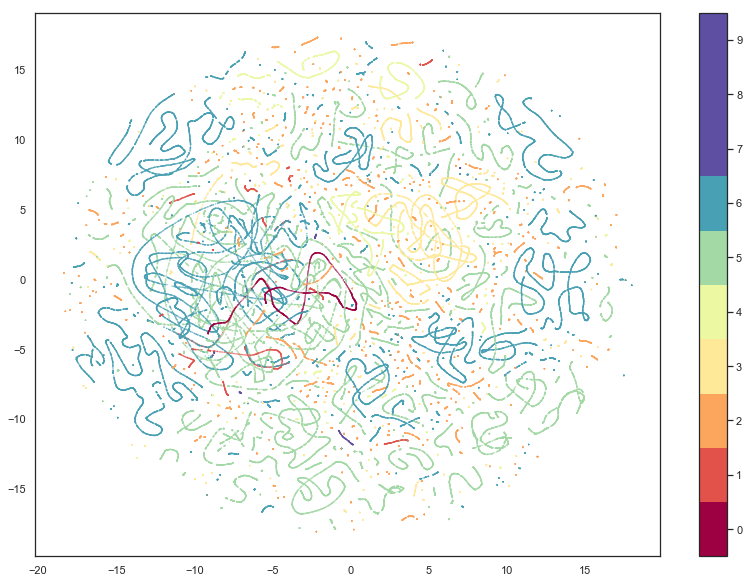

In [48]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(frame_3b)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=frame_3b.account_category_codes, s=0.1, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10));

### INTERESTINGG that without the author field, you still get a similar squiggly pattern so it isn't like just the author field is connecting those points

In [49]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(frame_3b)

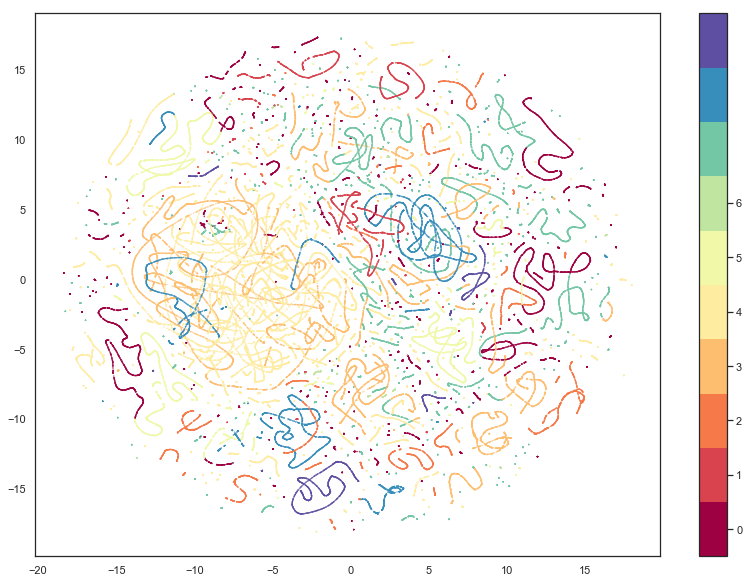

In [50]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(7))

In [51]:
(
    adjusted_rand_score(frame_3b.account_category_codes, kmeans_labels),
    adjusted_mutual_info_score(frame_3b.account_category_codes, kmeans_labels)
)

(0.09322833491981615, 0.23756017169792729)

-------------------

In [52]:
lowd_frame_3b = PCA(n_components=9).fit_transform(frame_3b)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_frame_3b)


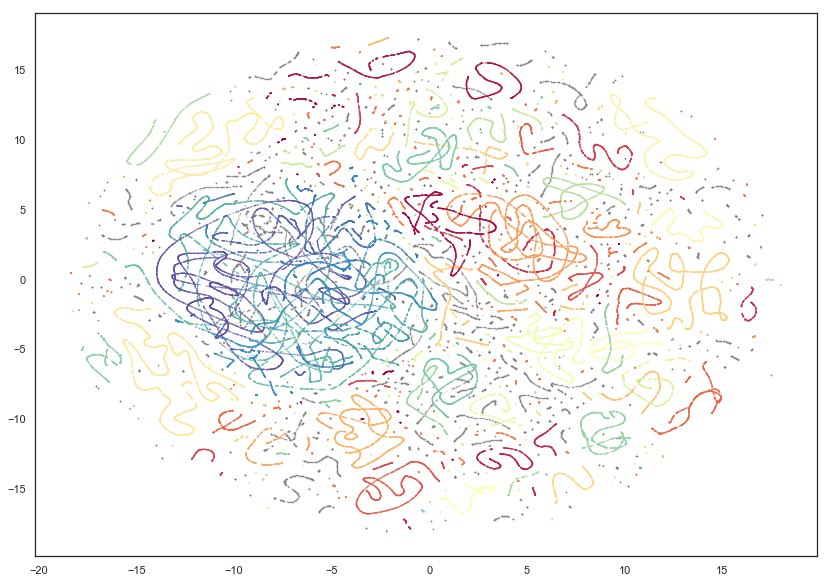

In [53]:
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

In [54]:
(
    adjusted_rand_score(frame_3b.account_category_codes, hdbscan_labels),
    adjusted_mutual_info_score(frame_3b.account_category_codes, hdbscan_labels)
)

(0.05873042254164268, 0.28692839275674425)

In [55]:
clustered = (hdbscan_labels >= 0)
(
    adjusted_rand_score(frame_3b.account_category_codes[clustered], hdbscan_labels[clustered]),
    adjusted_mutual_info_score(frame_3b.account_category_codes[clustered], hdbscan_labels[clustered])
)

(0.09791295635182623, 0.32706719714953414)

In [56]:
np.sum(clustered) / frame_3b.shape[0]

0.78667

In [57]:
embedding  = reducer.fit_transform(frame_3b)
embedding.shape

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 670 connected components using meta-embedding (experimental)
  n_components
/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(100000, 2)

In [58]:
print(list_codes)

[{'HashtagGamer': 2}, {'Fearmonger': 1}, {'NonEnglish': 5}, {'LeftTroll': 3}, {'RightTroll': 6}, {'Unknown': 7}, {'NewsFeed': 4}, {'Commercial': 0}]


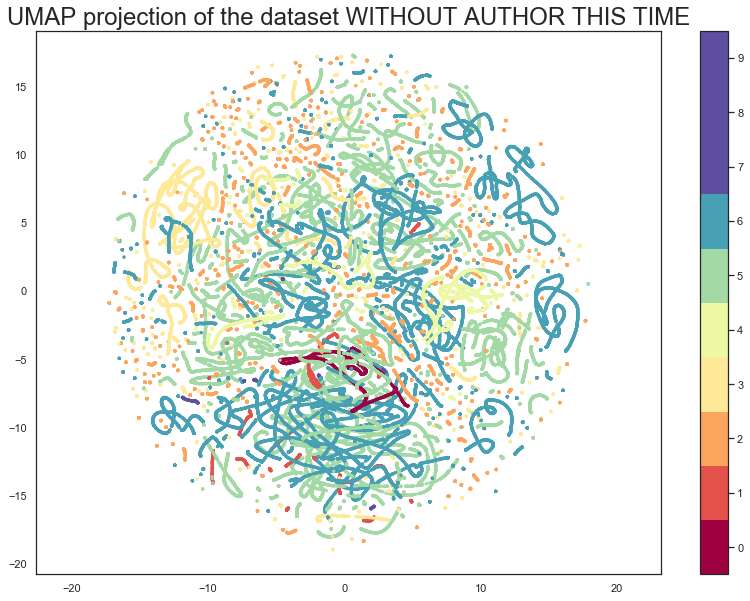

In [59]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=frame_3b.account_category_codes, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset WITHOUT AUTHOR THIS TIME', fontsize=24);

### Is the length of the string tied to something? The extent to which things are repleys or retweets? The extent to which they're bots?

---------

--------

In [60]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(frame_3b)

/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 405 connected components using meta-embedding (experimental)
  n_components
/Users/justingosses/anaconda/envs/MannvilleDask2/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


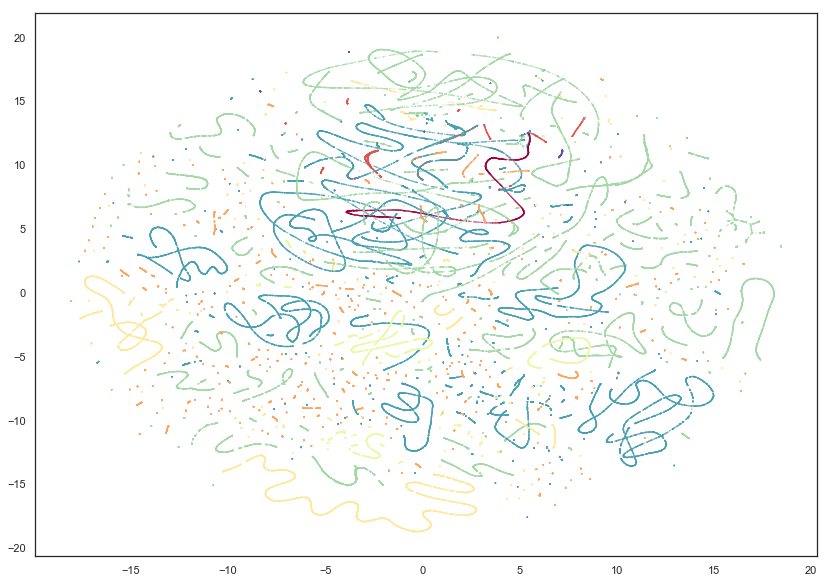

In [61]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=frame_3b.account_category_codes, s=0.1, cmap='Spectral');

In [62]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

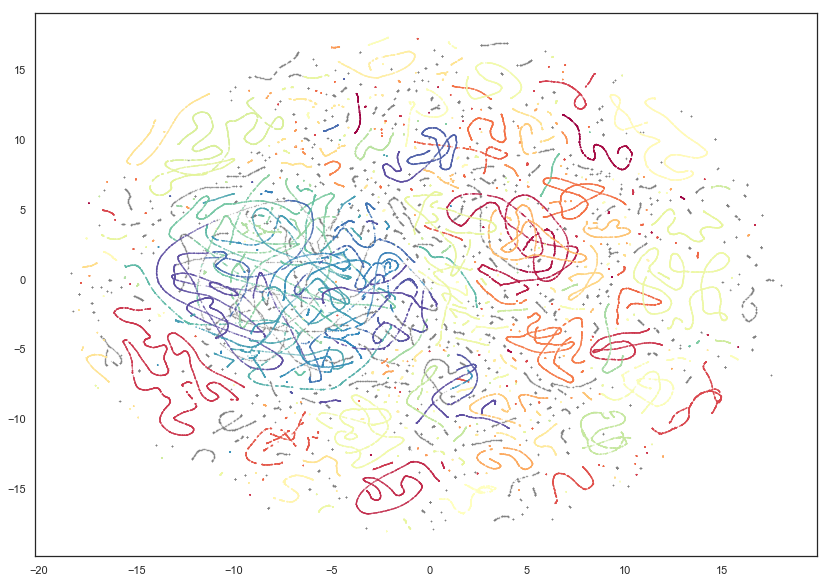

In [64]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

lots of overlap between blue and green? Is that russian language and right wing troll? Need to look more

In [65]:
adjusted_rand_score(frame_3b.account_category_codes, labels), adjusted_mutual_info_score(frame_3b.account_category_codes, labels)

(0.027299306269260006, 0.1826272827967428)

In [66]:
clustered = (labels >= 0)
(
    adjusted_rand_score(frame_3b.account_category_codes[clustered], labels[clustered]),
    adjusted_mutual_info_score(frame_3b.account_category_codes[clustered], labels[clustered])
)


(0.05377007339982503, 0.20292621296502017)

In [67]:
np.sum(clustered) / frame_3b.account_category_codes.shape[0]

0.76826

In [107]:
#frame_3[0:800]

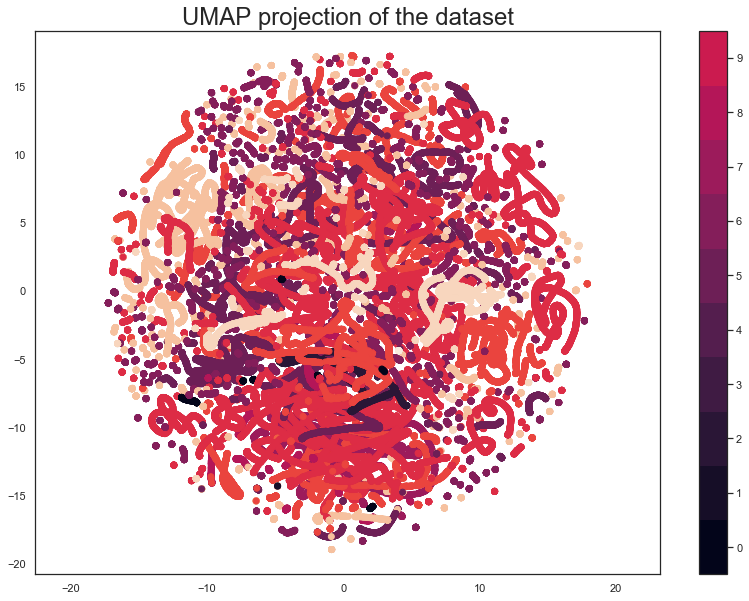

In [69]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=frame_3b.account_type_codes)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.savefig('books_read.png', dpi=100)
plt.title('UMAP projection of the dataset', fontsize=24);